# The Spark Foundation Dec 2020 Batch

**Data Science and Business Analytics internship**

 **Prediction using Supervised ML**

 **Percentage of an student based on the no. of study hours**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn import metrics

###### Part 1: Import the data

In [3]:
data=pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Data set size(25 rows and 2 columns)
print('Shape -',data.shape)

Shape - (25, 2)


In [5]:
# check for nulls
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#Summary of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


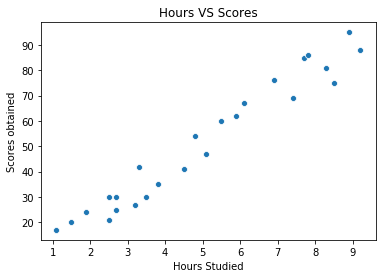

In [7]:
#visualize the relationship  using scatteredplot

sns.scatterplot(data=data, x="Hours", y="Scores") 
plt.title("Hours VS Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores obtained")
plt.show()


**From the above graph we can  there is a positive linear relation between the numbers of hours studied and marks obtained**

In [8]:
#Correlation btw Hours and scores
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
# Dividing the data into attributes and labels

# X is a independent variable
# y is a dependent variable

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [10]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [11]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [12]:
print(X.shape)

(25, 1)


In [13]:
print(y.shape)

(25,)


In [14]:
# We will split data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
print(X_train.shape)

(20, 1)


In [16]:
print(y_train.shape)

(20,)


# Training data with linear regression algorithm


In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# we will plot the regression line
line = lr.coef_*X+lr.intercept_

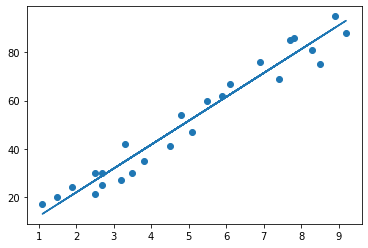

In [19]:
# we will plot for test data
plt.scatter(X,y)
plt.plot(X, line);
plt.show()


In [20]:
# Lets print shape of x_train and x_test
print(X_train.shape)
print(X_test.shape)

(20, 1)
(5, 1)


**Making Prediction**

As we have trained our model then now it's time to do some predictions

In [21]:
# we will predict scores
y_pred = lr.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [22]:
y_test


array([20, 27, 69, 30, 62], dtype=int64)

In [23]:
# we will compare Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Test the data


In [24]:
hours = np.array([9.25])
pred = lr.predict(hours.reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred))

No of Hours = [9.25]
Predicted Score = [93.69173249]


Evaluating the model

In [25]:
# we will calculate Mean Absolute error
from sklearn import metrics
mat = metrics.mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mat)

Mean Absolute Error: 4.183859899002975


                                                         **Thank you**